# Visualization Preparation

## Import Libraries and Dataset

In [1]:
# import libraries
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

%matplotlib inline

In [2]:
# load data from database
engine = create_engine('sqlite:///DisasterResponse.db')

# connect to the database
conn = sqlite3.connect('DisasterResponse.db')

# run a query
df = pd.read_sql('SELECT * FROM disaster', conn)

In [3]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# set single color for all plots
base_color = sns.color_palette()[0]

## V1: Distribution of Message Relevance

In [5]:
# create dictionary for mapping of the 'related' column
related_dict = {0: 'not_related', 1: 'related', 2: 'cannot be determined'}

# extract 'related' column and set x & y values
related = df['related'].map(related_dict)
related_counts = related.value_counts()
related_names = list(related_counts.index)

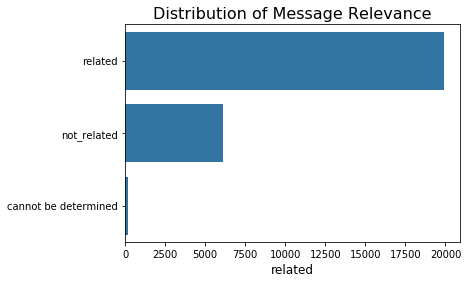

In [6]:
# create bar plot
plt.title('Distribution of Message Relevance', fontsize=16)
plt.xlabel('Count', fontsize=12)
sns.barplot(related_counts, related_names, color=base_color);

## V2: Proportion of Message Categories

In [7]:
# extract the the rest of the categories excluding 'related' and set x and y values
categories = df.iloc[:,4:]
categories_mean = categories.mean().sort_values(ascending=False)[1:11]
categories_names = list(categories_mean.index)

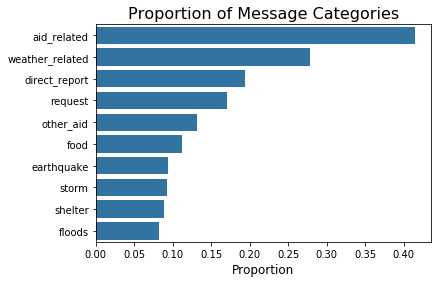

In [8]:
# create bar plot
plt.title('Proportion of Message Categories', fontsize=16)
plt.xlabel('Proportion', fontsize=12)
sns.barplot(categories_mean, categories_names, color=base_color);